<h1>Task 2</h1>
<p>In this Task we are going to Divide the given data into Cluster And Find the Distance Between the Clusters</p>

<p>Importing All The Required Libraries And Assigning Variables</p>

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

epsilon = 3         #Change These PArameters If needed
min_samples = 3  

<p>Creating a Class With All the Funtions for Clustering</p>

In [4]:
class DBSCAN():
    def __init__(self,eps = 3,minpts = 2):
        self.eps = eps               #Initializing Properties of the class
        self.minpts = minpts
        self.clustercount = 0

    def distance(self,x1, x2):       #Function To return Distance Between Two Point
        return np.sqrt(np.sum((x1 - x2)**2))

    def Neighbors(self,data, point_idx, epsilon):       #Function to Return Neighbors of the Point
        neighbors = []
        for i in range(len(data)):
            if self.distance(data[point_idx], data[i]) <= epsilon:
                neighbors.append(i)
        return neighbors

    def dbscan(self,data):

        # -1 : Outlier Or Unvisited
        # 0 to n Nth CLuster

        labels = np.full(len(data), -1)
        current_label = 0
        
        for i in range(len(data)):

            if labels[i] != -1:
                continue
            
            neighbors = self.Neighbors(data, i, self.eps)
            
            if len(neighbors) < self.minpts:   #Checks If the Point is Core Point or Outlier
                labels[i] = -1
            else:
                labels[i] = current_label

                i = 0

                #If the  its a Core point then its Neighbors Are Checked And Joined In the Same Cluster

                while i < len(neighbors):
                    neighbor_idx = neighbors[i]
            
                    if labels[neighbor_idx] == -1:  
                        labels[neighbor_idx] = current_label
                        sub_neighbors = self.Neighbors(data, neighbor_idx, self.eps)
                
                        if len(sub_neighbors) >= self.minpts:
                            neighbors.extend(sub_neighbors)
            
                    elif labels[neighbor_idx] == 0:
                        labels[neighbor_idx] = current_label
            
                    i += 1

                current_label += 1
        
        return labels
    
def distance(x1, x2):           #Function To return Distance Between Points
    return np.sqrt(np.sum((x1 - x2)**2))


<p>Defining a Function Which Converts the Image into a Nparray and Returns the Distance between the clusters</p>

In [5]:
def dbscan_cluster(imgno):                 #Function to Generate the graph and Distance Between the Cluster 
    
    img = Image.open(f'img/{imgno}.png')   #Reading the Image   
    arr = np.array(img)                    #Converting The Img to NDarray

    x=[]
    y=[]
    arr2=[]

    for i in range(arr.shape[0]):           #Converting All points into Coordinates
        for j in range(arr.shape[1]):
            if arr[i][j][0] == 255:
                y.append(64-i)
                x.append(j)
                arr2.append([j,64-i])

    arr2 = np.array(arr2)

    alg = DBSCAN(eps=epsilon,minpts=min_samples)  #Creating An Object Of the CLass DBSCAN
    cluster_labels = alg.dbscan(arr2)


    df = pd.DataFrame()                           #A Pandas DataFrame For Storing Data
    df['X'] = x
    df['Y'] = y
    df['Cluster'] = cluster_labels

    le=len(df[df['Cluster'] == -1])
    lis=[]
    idx = 0
    centr = []

    while le<len(cluster_labels):                #Differentiating All the Clusters
        lis.append(df[df['Cluster']==idx])
        le+=len(df[df['Cluster']==idx])
        idx+=1

    for i in range(len(lis)):                   #Finding The Centre of the CLutser
        x_c=0
        y_c=0
        x_lis = list(lis[i]['X'])
        y_lis = list(lis[i]['Y'])
        for j in range(len(x_lis)):
            x_c+=x_lis[j]
            y_c+=y_lis[j]
        x_c/=len(lis[i])
        y_c/=len(lis[i])
        centr.append([x_c,y_c])

    centr.append(centr[0])

    dist_lis = []
    name_lis = []
    for i in range(len(centr)-1):
        name_lis.append(f"Cluster {i+1} and Cluster {i+2}")
        dist_lis.append(distance(np.array(centr[i]),np.array(centr[i+1])))

    table = pd.DataFrame()              #Creating A DataFrame With Cluster Names And distance
    table['Clusters'] = name_lis        
    table['Distances'] = dist_lis

    print(table)

    fig = plt.scatter(x=df['X'],y=df['Y'],c = df['Cluster'])   #Generating An Image of the Clusters
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    fig = plt.plot([i[0] for i in centr],[i[1] for i in centr])

    plt.show()


                  Clusters  Distances
0  Cluster 1 and Cluster 2  44.424610
1  Cluster 2 and Cluster 3  24.956304
2  Cluster 3 and Cluster 4  26.397524


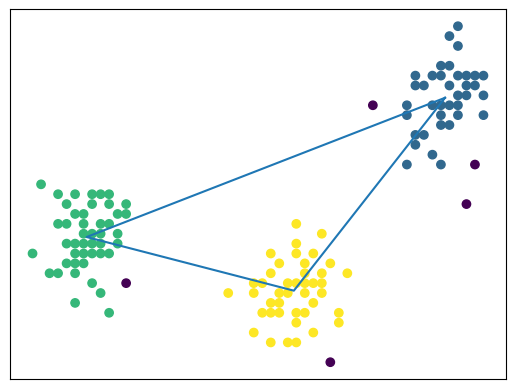

In [6]:
dbscan_cluster(1)

                  Clusters  Distances
0  Cluster 1 and Cluster 2  21.753734
1  Cluster 2 and Cluster 3  17.660262
2  Cluster 3 and Cluster 4  23.132776


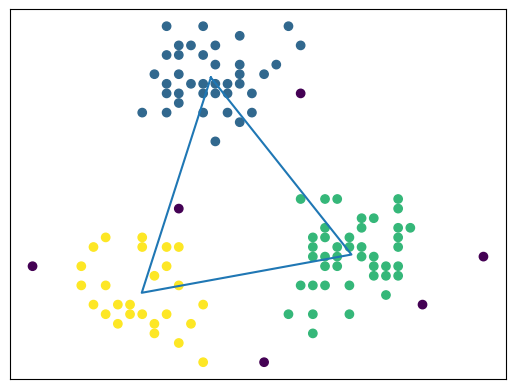

In [7]:
dbscan_cluster(2)

                  Clusters  Distances
0  Cluster 1 and Cluster 2  40.622612
1  Cluster 2 and Cluster 3  39.232196
2  Cluster 3 and Cluster 4  40.206222
3  Cluster 4 and Cluster 5  38.988873


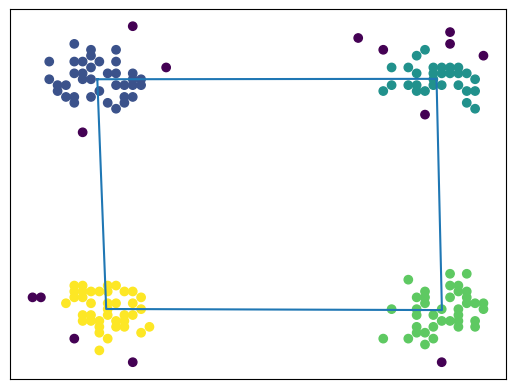

In [8]:
dbscan_cluster(3)

                  Clusters  Distances
0  Cluster 1 and Cluster 2   9.975392
1  Cluster 2 and Cluster 3  30.903218
2  Cluster 3 and Cluster 4  40.801981


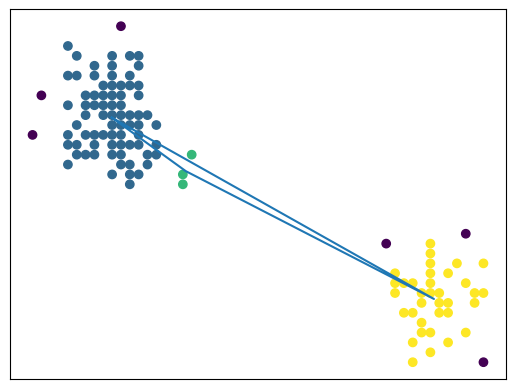

In [9]:
dbscan_cluster(4)